# Risk Adjusted Performance Metrics (Sharpe Ratio)

## Sharpe Ratio & Risk Free Asset Definition

$$
SharpeRatio = \frac{PortReturn - RFR}{PortRisk} 
$$

- RFR : As an approximation usually used the annual yield of government issued bond

In [410]:
risk_free_return = 0.0635 #indonesia 5 years gov bond coupon rate 
risk_free_rate = 0 # as government bond will almost never default this is the 0 is always the risk free rate 
rf = [risk_free_return, risk_free_rate]

In [411]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [412]:
port = pd.DataFrame()
tickers = ['ITMG.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk', 'UNTR.jk'] #,
# tickers = ['ANTM.jk', 'ASII.jk', 'BBCA.jk', 'BBRI.jk', 'BMRI.jk', 'ICBP.jk', 'JSMR.jk', 'MEDC.jk', 'PGAS.jk', 'PTBA.jk', 'PTPP.jk', 'PWON.jk', 'SMRA.jk','TLKM.jk', 'UNVR.jk', 'WSKT.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-03-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Portfolio Analysis With Sharpe Ratio

### Recreating 100K Random Portfolios

In [413]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary

ret = port.pct_change().dropna()
annual_ret = annual_return(ret)

In [414]:
annual_ret

,return,risk
ITMG.jk,0.359641,0.447103
ADRO.jk,0.395084,0.473652
AMRT.jk,0.394461,0.426777
MPMX.jk,0.361526,0.449145
APIC.jk,0.231005,0.267874
HEXA.jk,0.367503,0.320112
MFIN.jk,0.228041,0.377423
MBAP.jk,0.411074,0.406595
BYAN.jk,0.818237,0.529729
MTDL.jk,0.366687,0.444361


In [415]:
port_amount = len(port.columns)
nop = 100_000

np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)

port_ret = ret.dot(norm_port.T)
summary = annual_return(port_ret)

summary

,return,risk
0,0.329849,0.180661
1,0.349051,0.182757
2,0.385554,0.189143
3,0.338577,0.171894
4,0.307703,0.175038
...,...,...
99995,0.341555,0.209498
99996,0.366671,0.172287
99997,0.343434,0.183751
99998,0.348793,0.176323


### Caclulating Sharpe Ratio

In [416]:
annual_ret['sharpe'] = (annual_ret['return'].sub(rf[0])) / annual_ret['risk']
annual_ret.sort_values('sharpe', ascending = False)

,return,risk,sharpe
BYAN.jk,0.818237,0.529729,1.424760
HEXA.jk,0.367503,0.320112,0.949677
MBAP.jk,0.411074,0.406595,0.854839
AMRT.jk,0.394461,0.426777,0.775490
ARNA.jk,0.272795,0.292215,0.716238
BSSR.jk,0.458701,0.564238,0.700414
ADRO.jk,0.395084,0.473652,0.700057
MTDL.jk,0.366687,0.444361,0.682299
MPMX.jk,0.361526,0.449145,0.663540
ITMG.jk,0.359641,0.447103,0.662354


In [417]:
summary['sharpe']= (summary['return'].sub(rf[0]))/summary['risk']
summary

,return,risk,sharpe
0,0.329849,0.180661,1.474302
1,0.349051,0.182757,1.562459
2,0.385554,0.189143,1.702698
3,0.338577,0.171894,1.600268
4,0.307703,0.175038,1.395141
...,...,...,...
99995,0.341555,0.209498,1.327244
99996,0.366671,0.172287,1.759688
99997,0.343434,0.183751,1.523439
99998,0.348793,0.176323,1.618015


In [418]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.345852,0.189623,1.494959
std,0.024502,0.012711,0.156248
min,0.246926,0.147435,0.918177
25%,0.328446,0.180797,1.382447
50%,0.345891,0.188804,1.497425
75%,0.362917,0.197665,1.607061
max,0.449412,0.257376,2.050328


 ### Visualizing Sharpe Ratio

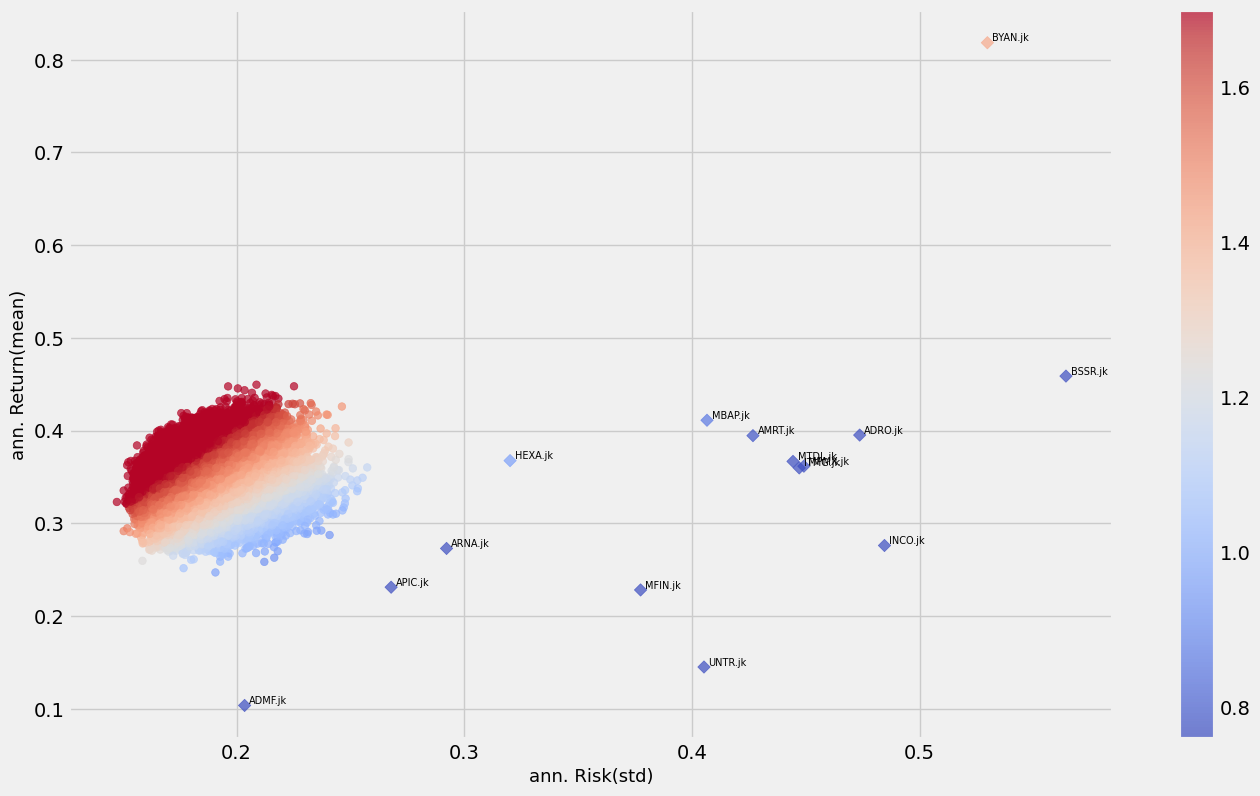

In [419]:
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "risk"], summary.loc[:, "return"], s = 30,
            c =summary.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
plt.colorbar()
plt.scatter(annual_ret.loc[:, "risk"], annual_ret.loc[:, "return"], s = 40, marker = "D",
            c =annual_ret.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
for i in annual_ret.index:
    plt.annotate(i, xy = ((annual_ret.loc[i, 'risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002)), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()

## Finding the Optimum Porfolio - The Max Sharpe Ratio

### Checking 100K Random Porfolios

In [420]:
summary.head()

,return,risk,sharpe
0,0.329849,0.180661,1.474302
1,0.349051,0.182757,1.562459
2,0.385554,0.189143,1.702698
3,0.338577,0.171894,1.600268
4,0.307703,0.175038,1.395141


In [421]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.345852,0.189623,1.494959
std,0.024502,0.012711,0.156248
min,0.246926,0.147435,0.918177
25%,0.328446,0.180797,1.382447
50%,0.345891,0.188804,1.497425
75%,0.362917,0.197665,1.607061
max,0.449412,0.257376,2.050328


### Finding Portfolio Index With The Highest Sharpe Ratio

In [422]:
msrp = summary['sharpe'].idxmax()
msrp

75539

In [423]:
msrp_summary = summary.iloc[msrp, :]
msrp_summary

return    0.383915
risk      0.156275
sharpe    2.050328
Name: 75539, dtype: float64

### Weight of The Portfoluo With The Highest Sharpe Ratio

In [424]:
msrp_weight = norm_port[msrp,:]
msrp_weight

array([0.02437222, 0.00328426, 0.09895957, 0.05449253, 0.19149273,
       0.11334444, 0.01525702, 0.04004731, 0.1460346 , 0.07408492,
       0.0190253 , 0.01794356, 0.01572253, 0.16233412, 0.02360491])

#### Weight of Each Portfolios

In [425]:
pd.Series(index = port.columns, data = msrp_weight).sort_values(ascending = False)

APIC.jk    0.191493
ARNA.jk    0.162334
BYAN.jk    0.146035
HEXA.jk    0.113344
AMRT.jk    0.098960
MTDL.jk    0.074085
MPMX.jk    0.054493
MBAP.jk    0.040047
ITMG.jk    0.024372
UNTR.jk    0.023605
BSSR.jk    0.019025
ADMF.jk    0.017944
INCO.jk    0.015723
MFIN.jk    0.015257
ADRO.jk    0.003284
dtype: float64

# Appendix

## Optimization portfolio

Method Might not work on some portfolios 

In [426]:
import scipy.optimize as sco

In [427]:
ret.head() #stocks daily return on the selected period

,ITMG.jk,ADRO.jk,AMRT.jk,MPMX.jk,APIC.jk,HEXA.jk,MFIN.jk,MBAP.jk,BYAN.jk,MTDL.jk,BSSR.jk,ADMF.jk,INCO.jk,ARNA.jk,UNTR.jk
Date,,,,,,,,,,,,,,,
2019-04-02,0.003145,-0.018519,-0.011111,0.096154,0.009009,0.013115,0.033333,0.010489,0.000000,-0.033019,-0.012605,0.000000,-0.016901,0.000000,-0.022873
2019-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-04,-0.045932,-0.037736,0.028090,-0.035088,-0.017857,0.000000,-0.013825,-0.024221,0.005291,0.014634,-0.008511,-0.004706,-0.008596,-0.009804,-0.007491
2019-04-05,-0.023952,-0.011765,0.000000,-0.004545,0.045455,0.022654,0.000000,-0.003546,0.000000,0.048077,-0.012875,0.016548,0.000000,0.009901,-0.004717
2019-04-08,-0.038037,0.000000,0.000000,0.018265,-0.008696,0.000000,0.009346,-0.035587,0.000000,0.036697,-0.008696,-0.011628,-0.026012,-0.019608,-0.018010


In [428]:
noa = len(ret.columns)
noa # number of assests

15

## Calculation of weights

In [429]:
#calculate annualized portfolio return (based on weights)
def port_ret(weights):
    return ret.dot(weights.T).mean() * 250

In [430]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(250)

In [431]:
#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize sharpe ratio == minimize sharpe ratio * (-1)
def min_func_sharpe(weights): 
     return (rf[0] - port_ret(weights)) / port_vol(weights) #sharpe ratio * (-1)

### Optimization Calculation 

In [432]:
eweights = np.full(noa , 1/noa)
eweights

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [433]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [434]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))

In [435]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", bounds = bnds, constraints= cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.2169295502709345
       x: [ 0.000e+00  0.000e+00 ...  1.627e-01  3.300e-16]
     nit: 13
     jac: [-1.453e-01 -1.633e-01 ... -3.799e-01  7.528e-01]
    nfev: 220
    njev: 13

In [436]:
optimum_weight = result['x']

In [437]:
port_ret(optimum_weight)

ValueError: Dot product shape mismatch, (988, 15) vs (14,)

In [ ]:
port_vol(optimum_weight)

In [ ]:
-min_func_sharpe(optimum_weight)

In [ ]:
opt_weight = pd.Series(index = ret.columns, data = optimum_weight)
opt_weight